In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/all_finaldata.csv")
df.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta
0,0,0,1,650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0
1,1,0,1,651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0
2,2,0,1,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0
3,3,0,1,653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0
4,4,0,1,654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0


In [5]:
# add binary variable on 2019 export value
df['trade_2014_binary'] = (df['export_value_2014'] > 0) * 1
df['trade_2019_binary'] = (df['export_value_2019'] > 0) * 1
df.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary
0,0,0,1,650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0
1,1,0,1,651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0
2,2,0,1,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0
3,3,0,1,653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0
4,4,0,1,654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0


In [7]:
#sanity check
df[(df['trade_2014_binary']==1) | (df['trade_2019_binary']==1)].head(20)

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary
27,27,0,1,677,0.0,0.0,0.000000,0.000000,2124.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
28,28,0,1,678,0.0,0.0,0.000000,0.000000,38819.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
153,153,0,1,803,0.0,0.0,0.000000,0.000000,1149.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
159,159,0,1,809,0.0,0.0,0.000000,0.000000,3158.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
176,176,0,1,826,0.0,0.0,0.000000,0.000000,4987.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
442,442,0,1,1092,0.0,0.0,0.000000,0.000000,5066.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
443,443,0,1,1093,0.0,0.0,0.000000,0.000000,182153.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
566,566,0,1,1216,0.0,0.0,0.000000,0.000000,2023.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
1070,1070,0,1,1720,0.0,0.0,0.000000,0.000000,2685.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0
1157,1157,0,1,1807,0.0,0.0,0.000000,0.000000,123065.0,1.030314,-0.021657,13257.81,1.030314,-0.021657,1,0


In [9]:
#sanity check
df[(df['trade_2014_binary']==1) & (df['trade_2019_binary']==0)]

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary
7671,7671,0,7,833,123032.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,12735.01,-0.815531,0.292281,0,1
8280,8280,0,7,1442,2614.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,12735.01,-0.815531,0.292281,0,1
8383,8383,0,7,1545,8578.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,12735.01,-0.815531,0.292281,0,1
21466,21466,0,18,900,8656.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,7847.07,-0.815531,0.292281,0,1
22066,22066,0,18,1500,26032.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,7847.07,-0.815531,0.292281,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80183749,80183749,250,249,1647,3442.0,0.0,0.538312,0.079821,0.0,0.00000,0.000000,NaN,-0.538312,-0.079821,0,1
80183764,80183764,250,249,1662,9347.0,0.0,0.538312,0.079821,0.0,0.00000,0.000000,NaN,-0.538312,-0.079821,0,1
80183925,80183925,250,249,1823,17743.0,0.0,0.538312,0.079821,0.0,1.33131,0.253223,NaN,0.792998,0.173402,0,1
80183969,80183969,250,249,1867,4142.0,4362.0,0.538312,0.079821,0.0,0.00000,0.000000,NaN,-0.538312,-0.079821,0,1


In [11]:
#sanity check
len(df[(df['trade_2019_binary']==1)])

3517617

In [12]:
# if 2014 or 2019 binary variables are 1, then its a trade regardless of whether the other one is 0 or 1. 
# so create anaother binary variable (our target variable) which follows the below: 
# 0-0:0 ; 0-1:1; 1-0:1; 1-1:1 

df["trade_binary"] = df['trade_2019_binary']+ df['trade_2014_binary']
df['trade_binary'] = df['trade_binary'].replace(2,1)
df.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary
0,0,0,1,650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0,0
1,1,0,1,651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0,0
2,2,0,1,652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0,0
3,3,0,1,653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0,0
4,4,0,1,654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13257.81,0.0,0.0,0,0,0


In [14]:
#sanity check

df[(df['trade_2019_binary']==1)& (df['trade_2014_binary']==1)]

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary
50726,50726,0,41,1456,208633.0,544814.0,0.815531,-0.292281,7452.0,1.030314,-0.021657,8056.332,0.214783,0.270624,1,1,1
51093,51093,0,41,1823,77018.0,5354670.0,0.815531,-0.292281,22322.0,1.030314,-0.021657,8056.332,0.214783,0.270624,1,1,1
51094,51094,0,41,1824,107726.0,9018637.0,0.815531,-0.292281,336901.0,1.030314,-0.021657,8056.332,0.214783,0.270624,1,1,1
60103,60103,0,49,849,322144.0,1007126.0,0.815531,-0.292281,162540.0,1.030314,-0.021657,1036.634,0.214783,0.270624,1,1,1
60627,60627,0,49,1373,458.0,1187.0,0.815531,-0.292281,2222.0,1.030314,-0.021657,1036.634,0.214783,0.270624,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80183986,80183986,250,249,1884,12257.0,0.0,0.538312,0.079821,16590.0,1.331310,0.253223,NaN,0.792998,0.173402,1,1,1
80183987,80183987,250,249,1885,99630.0,0.0,0.538312,0.079821,601466.0,1.331310,0.253223,NaN,0.792998,0.173402,1,1,1
80183989,80183989,250,249,1887,133519.0,0.0,0.538312,0.079821,48773.0,1.331310,0.253223,NaN,0.792998,0.173402,1,1,1
80183990,80183990,250,249,1888,6968.0,0.0,0.538312,0.079821,11923.0,1.331310,0.253223,NaN,0.792998,0.173402,1,1,1


In [15]:
len(df[(df['trade_binary']==1)])

4433372

In [16]:
df.shape

(82108416, 17)

In [18]:
# trade data vs all data = ~5% 

4433372/82108416

0.05399412406153347

In [30]:
# check for nan values
df_nan = df[df.isna().any(axis=1)
df_nan[df_nan['trade_binary']==1] #we will drop all NaN rows because of lack of data

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary
67392,67392,0,55,650,5006.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,NaN,-0.815531,0.292281,0,1,1
67396,67396,0,55,654,2573.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,NaN,-0.815531,0.292281,0,1,1
67399,67399,0,55,657,1166.0,0.0,0.815531,-0.292281,0.0,0.00000,0.000000,NaN,-0.815531,0.292281,0,1,1
67410,67410,0,55,668,2759.0,53305.0,0.815531,-0.292281,0.0,0.00000,0.000000,NaN,-0.815531,0.292281,0,1,1
67413,67413,0,55,671,6175.0,8190.0,0.815531,-0.292281,0.0,0.00000,0.000000,NaN,-0.815531,0.292281,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80183987,80183987,250,249,1885,99630.0,0.0,0.538312,0.079821,601466.0,1.33131,0.253223,NaN,0.792998,0.173402,1,1,1
80183988,80183988,250,249,1886,0.0,0.0,0.000000,0.000000,1483.0,1.33131,0.253223,NaN,1.331310,0.253223,1,0,1
80183989,80183989,250,249,1887,133519.0,0.0,0.538312,0.079821,48773.0,1.33131,0.253223,NaN,0.792998,0.173402,1,1,1
80183990,80183990,250,249,1888,6968.0,0.0,0.538312,0.079821,11923.0,1.33131,0.253223,NaN,0.792998,0.173402,1,1,1


In [34]:
df_nan.shape

(22526400, 17)

In [35]:
df_final = df.dropna()

In [36]:
df_final.shape

(59582016, 17)

In [37]:
# now lets check the ratio of 1s to 0s in the dataset
len(df_final[(df_final['trade_binary']==1)])

4158714

In [39]:
# trade data vs all data = ~7% 
4158714/59582016

0.06979814177486039

In [ ]:
## Downsampling 

In [40]:
df_pos = df_final[(df_final['trade_binary']==1)]
df_neg = df_final[(df_final['trade_binary']==0)]

In [41]:
num_neg = len(df_pos)*2
print(num_neg)

8317428


In [42]:
df_neg_sampled = df_neg.sample(n=num_neg, random_state=0)
df_neg_sampled.shape

(8317428, 17)

In [44]:
df_downsampled = pd.concat([df_pos,df_neg_sampled], ignore_index=True)
df_downsampled

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary
0,27,0,1,677,0.0,0.0,0.0,0.0,2124.0,1.030314,-0.021657,13257.810,1.030314,-0.021657,1,0,1
1,28,0,1,678,0.0,0.0,0.0,0.0,38819.0,1.030314,-0.021657,13257.810,1.030314,-0.021657,1,0,1
2,153,0,1,803,0.0,0.0,0.0,0.0,1149.0,1.030314,-0.021657,13257.810,1.030314,-0.021657,1,0,1
3,159,0,1,809,0.0,0.0,0.0,0.0,3158.0,1.030314,-0.021657,13257.810,1.030314,-0.021657,1,0,1
4,176,0,1,826,0.0,0.0,0.0,0.0,4987.0,1.030314,-0.021657,13257.810,1.030314,-0.021657,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476137,33039957,103,107,1055,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,7411.062,0.000000,0.000000,0,0,0
12476138,43329710,135,160,1048,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10847.780,0.000000,0.000000,0,0,0
12476139,53753152,168,63,1194,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,12756.850,0.000000,0.000000,0,0,0
12476140,29996302,93,228,1272,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,10803.200,0.000000,0.000000,0,0,0


In [45]:
#shuffling the dataset
df_downsampled = df_downsampled.sample(frac=1)
df_downsampled

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary
11655332,9201829,28,206,975,0.0,5325.0,0.870802,0.675104,0.0,0.000000,0.000000,959.4427,-0.870802,-0.675104,0,0,0
11472764,925651,2,230,1533,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7581.0520,0.000000,0.000000,0,0,0
2384184,37968971,118,216,1717,0.0,846338.0,-0.846509,-0.829900,78806.0,-0.732506,-0.598679,535.9692,0.114003,0.231221,1,0,1
9222728,73612650,230,104,1268,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,15606.9900,0.000000,0.000000,0,0,0
6481245,36075936,112,236,650,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1343.8230,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496646,40134252,125,159,1718,0.0,0.0,0.000000,0.000000,9557.0,-1.554208,-1.145505,1574.3140,-1.554208,-1.145505,1,0,1
940067,18999734,59,121,832,1977176.0,0.0,1.810053,0.136176,7038950.0,1.784736,0.369632,8262.0630,-0.025317,0.233456,1,1,1
8932112,6718201,21,7,867,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6035.0360,0.000000,0.000000,0,0,0
9649992,16755302,52,114,1552,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,13182.3800,0.000000,0.000000,0,0,0


In [46]:
## conversion to log

# replace 0 with a very small value for log calc
df_downsampled['export_2019_log'] = df_downsampled['export_value_2019'].replace(0.0, 10e-5)
df_downsampled['export_2014_log'] = df_downsampled['export_value_2014'].replace(0.0, 10e-5)
df_downsampled['import_2014_log'] = df_downsampled['import_value_2014'].replace(0.0, 10e-5)
df_downsampled.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,hs_coi_2019,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary,export_2019_log,export_2014_log,import_2014_log
11655332,9201829,28,206,975,0.0,5325.0,0.870802,0.675104,0.0,0.000000,0.000000,959.4427,-0.870802,-0.675104,0,0,0,0.0001,0.0001,5325.0000
11472764,925651,2,230,1533,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7581.0520,0.000000,0.000000,0,0,0,0.0001,0.0001,0.0001
2384184,37968971,118,216,1717,0.0,846338.0,-0.846509,-0.829900,78806.0,-0.732506,-0.598679,535.9692,0.114003,0.231221,1,0,1,78806.0000,0.0001,846338.0000
9222728,73612650,230,104,1268,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,15606.9900,0.000000,0.000000,0,0,0,0.0001,0.0001,0.0001
6481245,36075936,112,236,650,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1343.8230,0.000000,0.000000,0,0,0,0.0001,0.0001,0.0001


In [47]:
# convert to log values
df_downsampled['export_2019_log'] = df_downsampled['export_2019_log'].apply(np.log)
df_downsampled['export_2014_log'] = df_downsampled['export_2014_log'].apply(np.log)
df_downsampled['import_2014_log'] = df_downsampled['import_2014_log'].apply(np.log)
df_downsampled['dist_log'] = df_downsampled['dist'].apply(np.log)
df_downsampled.head()

,Unnamed: 0,location_id,partner_id,product_id,export_value_2014,import_value_2014,hs_eci_2014,hs_coi_2014,export_value_2019,hs_eci_2019,...,dist,eci_delta,coi_delta,trade_2019_binary,trade_2014_binary,trade_binary,export_2019_log,export_2014_log,import_2014_log,dist_log
11655332,9201829,28,206,975,0.0,5325.0,0.870802,0.675104,0.0,0.000000,...,959.4427,-0.870802,-0.675104,0,0,0,-9.210340,-9.21034,8.580168,6.866353
11472764,925651,2,230,1533,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,7581.0520,0.000000,0.000000,0,0,0,-9.210340,-9.21034,-9.210340,8.933407
2384184,37968971,118,216,1717,0.0,846338.0,-0.846509,-0.829900,78806.0,-0.732506,...,535.9692,0.114003,0.231221,1,0,1,11.274744,-9.21034,13.648674,6.284077
9222728,73612650,230,104,1268,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,15606.9900,0.000000,0.000000,0,0,0,-9.210340,-9.21034,-9.210340,9.655474
6481245,36075936,112,236,650,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1343.8230,0.000000,0.000000,0,0,0,-9.210340,-9.21034,-9.210340,7.203274


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns

In [54]:
# modelling with only 3 regressors : export(2014), import(2014) and distances
X = df_downsampled[['export_2014_log', 'import_2014_log', 'dist_log']]
y = df_downsampled['trade_binary']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8733299, 3) (3742843, 3) (8733299,) (3742843,)


In [56]:
## classification by Logistic Regression 

model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_is = model.predict(X_train)
y_pred_os = model.predict(X_test)

print('In sample accuracy: {}'.format(model.score(X_train, y_train)))
print('Out of sample accuracy: {}'.format(model.score(X_test, y_test)))
# pred = model.predict(X)
# model.score(X, y)

In sample accuracy: 0.9349444007356212
Out of sample accuracy: 0.9349836474572938


In [60]:
cm=confusion_matrix(y_test, y_pred_os)
print(cm)

[[2471726   24622]
 [ 218724 1027771]]


<AxesSubplot:>

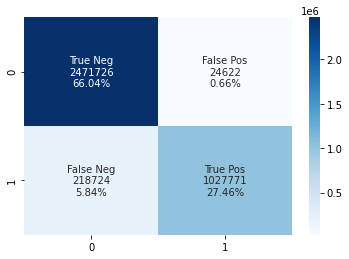

In [64]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [59]:
f1_score(y_test, y_pred_os)

0.8941462132996474

In [72]:
# modelling with 5 regressors : export(2014), import(2014), distances, eci 2014, coi 2014
X = df_downsampled[['export_2014_log', 'import_2014_log', 'dist_log', 'hs_eci_2014', 'hs_coi_2014']]
y = df_downsampled['trade_binary']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8733299, 5) (3742843, 5) (8733299,) (3742843,)


In [74]:
## classification by Logistic Regression 

model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_is = model.predict(X_train)
y_pred_os = model.predict(X_test)

print('In sample accuracy: {}'.format(model.score(X_train, y_train)))
print('Out of sample accuracy: {}'.format(model.score(X_test, y_test)))

In sample accuracy: 0.9375204032290662
Out of sample accuracy: 0.9374486186035589


In [75]:
cm=confusion_matrix(y_test, y_pred_os)
print(cm)

[[2472522   23068]
 [ 211052 1036201]]


<AxesSubplot:>

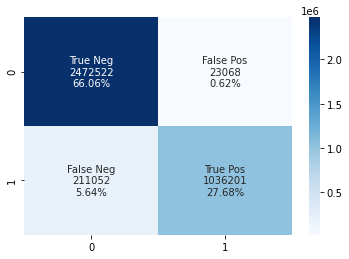

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [77]:
f1_score(y_test, y_pred_os)

0.8984965242039746

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Tuning the hyper-parameter max_leaf_nodes so that we can compare the decision tree model and random forests model 
# and calculating the Out-of-Sample Accuracy after tuning the hyper-parameter
param_grid ={'max_leaf_nodes':range(2,500,25)}

rf = RandomForestClassifier(n_estimators =30, n_jobs=-1)
gr = GridSearchCV(rf,param_grid=param_grid)
clf = gr.fit(X_train,y_train)
print(clf.best_params_)
print("The Out of Sample Accuracy after tuning the hyper-parameter is:", clf.score(X_test, y_test))